<a href="https://colab.research.google.com/github/Lyu-Sterkh/Sentiment-analysis/blob/main/Sent_analysis_Sequential_on_balanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [ ]:
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Google Drive

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Read in data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Datasets/Reviews.csv', index_col='Id')

In [ ]:
df_five = df.loc[(df['Score'] == 5)]
df_five = df_five.sample(500)
df_five.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)
df_five.head()

,Score,Text
Id,,
304803,5,These cheddar bunnies are perfect snacks for k...
170163,5,This coffee tastes good and it is cheep at thi...
360810,5,I also had heard from my lamaze class that red...
563687,5,I have never been a huge fan of oatmeal cookie...
515932,5,I was a bit nervous ordering this - considerin...


In [ ]:
df_four = df.loc[(df['Score'] == 4)]
df_four = df_four.sample(500)
df_four.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)
df_four.head()

,Score,Text
Id,,
163695,4,I hate to admit I miss the lard. I was the one...
84399,4,We know a lot about GF producs in my house and...
539236,4,With all the nonsense about pet food recalls a...
226598,4,"I take this to work and just add hot water, th..."
409991,4,I love the taste of this k-cup. Highly recomme...


In [ ]:
df_three = df.loc[(df['Score'] == 3)]
df_three = df_three.sample(500)
df_three.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)
df_three.head()

,Score,Text
Id,,
163349,3,this is the second time I have ordered these f...
534609,3,I had tried Jennies individually-wrapped cocon...
65305,3,I purchased this product online because I coul...
336230,3,I wanted my pup to love these. He is a 11 week...
187478,3,"This blend is okay, but for my taste it has a ..."


In [ ]:
df_two = df.loc[(df['Score'] == 2)]
df_two = df_two.sample(500)
df_two.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)
df_two.head()

,Score,Text
Id,,
237039,2,"This is a Knorr miss :( BLAND, very bland. It'..."
292392,2,I love Chinese almond cookies and these were a...
12481,2,The last bag of these I got from Amazon had a ...
433615,2,I bought this thinking it would be easier to h...
320949,2,These are absolutely awful. I like Stonewall's...


In [ ]:
df_one = df.loc[(df['Score'] == 1)]
df_one = df_one.sample(500)
df_one.drop(columns=['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)
df_one.head()

,Score,Text
Id,,
175881,1,So I get my case after feeling sucked into buy...
449402,1,I just purchased this jerky from a local store...
348747,1,"Warning, mine has stopped pumping water inside..."
539145,1,I ordered these delicious truffles once before...
433752,1,"As other reviewers have noted, this thing grow..."


In [ ]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 124468 to 251386
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   500 non-null    int64 
 1   Text    500 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [ ]:
df = pd.concat((df_one, df_two, df_three, df_four, df_five), axis=0).sample(frac=1)
df.head(20)

,Score,Text
Id,,
292641,2,I've purchased a couple of cases of 20 ounce c...
535910,4,"By far,this is the best flavored K cup coffee ..."
176684,3,I fell in love with yellow chicken curry after...
197659,1,I bought this product because I was looking fo...
76834,1,this is the worst tea ever. you definitely ge...
225393,1,the flowers did not look like they did in the ...
236942,4,Dried fruits and nuts constitute a fairly good...
113593,2,I bought this steak for my father in law for C...
244584,1,"Don't know why, but this version tasted terrib..."


In [ ]:
#df = df.to_csv('/content/drive/MyDrive/Colab Notebooks/df_balanced.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_balanced.csv')
df.head()

,Id,Score,Text
0,553478,5,All products were shipped quickly. They are v...
1,231270,5,"The chocolate flavor is not too sweet, relies ..."
2,105217,3,I ordered this for a hostess gift. So I don't ...
3,131126,5,"Great value, subscribe and save is the way to ..."
4,49047,3,"This product looks just as advertised, and it ..."


In [ ]:
df = df[df['Score'] != 3]
df['Sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else 0)
df.head(10)

<ipython-input-333-e59acf490cac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else 0)


,Id,Score,Text,Sentiment
0,553478,5,All products were shipped quickly. They are v...,1
1,231270,5,"The chocolate flavor is not too sweet, relies ...",1
3,131126,5,"Great value, subscribe and save is the way to ...",1
6,564034,2,I purchased this bone based on the research an...,0
7,81109,2,I bought these after recently being diagnosed ...,0
8,23082,4,My impressions: The coffee tastes fine but is...,1
9,56599,2,I was really looking forward to trying these c...,0
11,51853,1,Having a hard time locating this product in th...,0
12,194686,4,I first bought this in a local Hispanic market...,1
16,333960,4,Although I really do like Skinners Raisin Bran...,1


In [ ]:
df.reset_index(drop= True , inplace= True )
df.head()

,Id,Score,Text,Sentiment
0,553478,5,All products were shipped quickly. They are v...,1
1,231270,5,"The chocolate flavor is not too sweet, relies ...",1
2,131126,5,"Great value, subscribe and save is the way to ...",1
3,564034,2,I purchased this bone based on the research an...,0
4,81109,2,I bought these after recently being diagnosed ...,0


# Preprocessing

In [ ]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['br', 'href'])

In [ ]:
# Create preprocess with lemmatization
def df_preprocess_lemma(text):
    text = text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', 'site', text)
    text = re.sub('@[^\s]+', 'user', text)
    text = re.sub('[^а-яА-яa-zA-Z ]', ' ', text)
    wnl = WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

In [ ]:
df['Text'] = df['Text'].apply(df_preprocess_lemma)

In [ ]:
df['Text'][3]

'healthy great tasting jerky tuna excellent source protein one purest cleanest form get ahi tuna jerkey made high quality tuna something find beef product omega help heart health promotes better cardiovascular health'

# Vectorization

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
matrix = vectorizer.fit_transform(df['Text']).toarray()

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

In [ ]:
matrix = vectorizer.fit_transform(df['Text']).toarray()

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

In [ ]:
matrix = vectorizer.fit_transform(df['Text']).toarray()

# Train_test_split

In [ ]:
X = matrix
y = df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, test_size=0.3,
                                                    random_state=73)

# Sequential

## Model and layers

In [ ]:
SENTENCE_LENGTH = 72948
num_words = 100000

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(64,activation='relu',input_shape=(SENTENCE_LENGTH,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                4668736   
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,672,961
Trainable params: 4,672,961
Non-trainable params: 0
_________________________________________________________________


## Compile

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fit

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 0.6914 - accuracy: 0.5514 - val_loss: 0.6802 - val_accuracy: 0.7167
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 0.6029 - accuracy: 0.9907 - val_loss: 0.6509 - val_accuracy: 0.7567
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 0.4923 - accuracy: 0.9979 - val_loss: 0.6167 - val_accuracy: 0.7533
Epoch 4/20
3/3 [==============================] - 2s 740ms/step - loss: 0.3690 - accuracy: 0.9979 - val_loss: 0.5879 - val_accuracy: 0.7467
Epoch 5/20
3/3 [==============================] - 2s 851ms/step - loss: 0.2614 - accuracy: 0.9986 - val_loss: 0.5608 - val_accuracy: 0.7600
Epoch 6/20
3/3 [==============================] - 2s 829ms/step - loss: 0.1788 - accuracy: 0.9986 - val_loss: 0.5387 - val_accuracy: 0.7717
Epoch 7/20
3/3 [==============================] - 2s 723ms/step - loss: 0.1200 - accuracy: 0.9993 - val_loss: 0.5215 - val_accuracy: 0.7733
Epoch 8/20
3/3 [=============

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1)

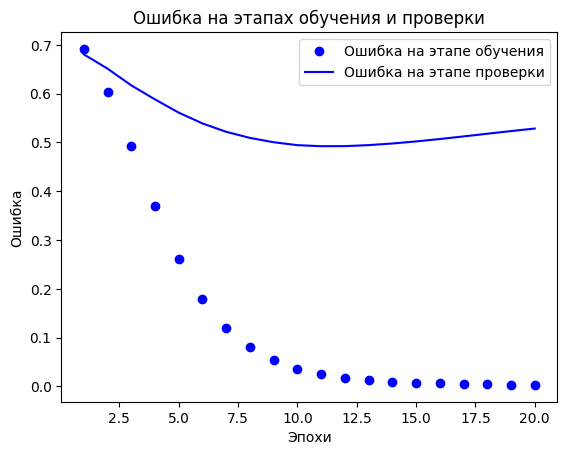

In [ ]:
plt.plot(epochs, loss_values, 'bo', label = 'Ошибка на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label = 'Ошибка на этапе проверки')
plt.title('Ошибка на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

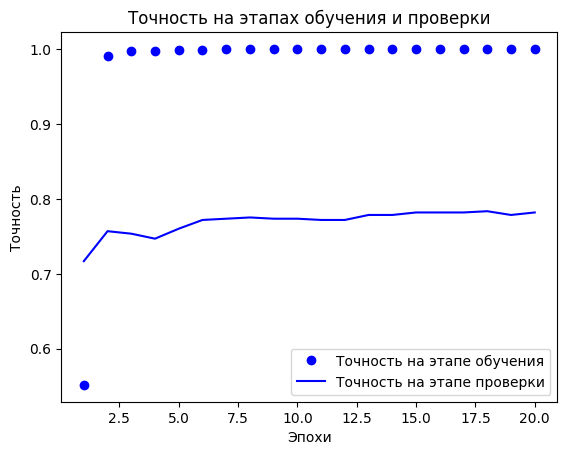

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label = 'Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
# level 0,5 for text classification
y_pred = (y_pred >= 0.5).astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

19/19 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       310
           1       0.74      0.84      0.79       290

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.79      0.78      0.78       600

[[226  84]
 [ 47 243]]
